In [37]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [38]:
df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [39]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [40]:
X=df[['Annual Income (k$)','Spending Score (1-100)']]
X.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


______________________________________________________________________________________________________________________
# Data Before Clustering
_______________________________________________________________________________________________________________________

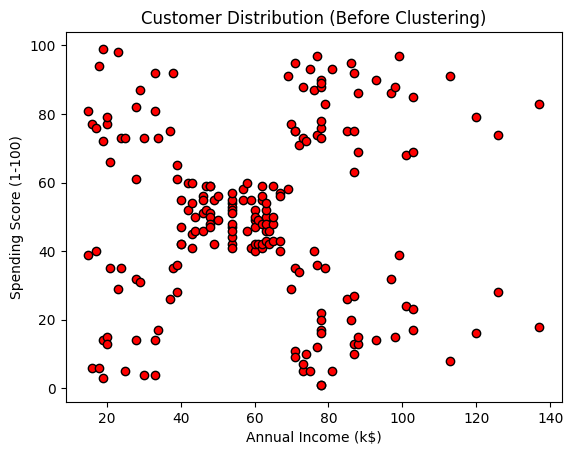

In [41]:
plt.scatter(df["Annual Income (k$)"],df["Spending Score (1-100)"],color="red",edgecolor="black")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("Customer Distribution (Before Clustering)")
plt.show()


In [42]:
scaler=StandardScaler()
X_Scaled=scaler.fit_transform(X)

______________________________________________________________________________________________________________________
# Using Elbow Method to find "K" for clustering
_______________________________________________________________________________________________________________________

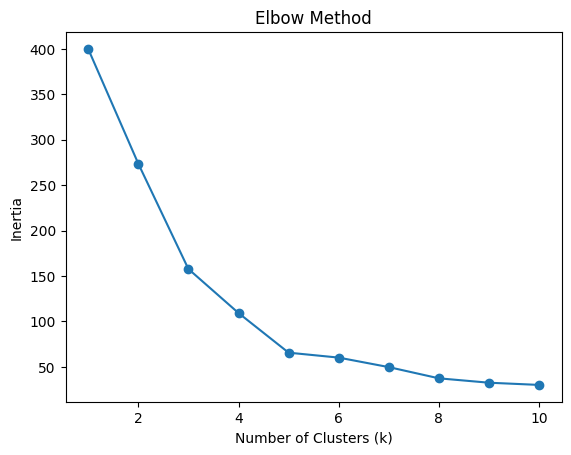

In [43]:
sd=[]
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_Scaled)
    sd.append(kmeans.inertia_)
plt.plot(range(1, 11),sd, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()


As we can see there are 2 elbows forming in the graph at 3 and 5. We will use both K's and visualize their results.
- k=3 → A simpler segmentation (broad groups).
- k=5 → A more detailed segmentation (smaller, finer groups).

______________________________________________________________________________________________________________________
# First Implementing K = 3
_______________________________________________________________________________________________________________________

In [44]:
k3 = KMeans(n_clusters=3, random_state=42)
y_k3 = k3.fit_predict(X)
df["Cluster3"] = y_k3
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster3
0,1,Male,19,15,39,2
1,2,Male,21,15,81,2
2,3,Female,20,16,6,2
3,4,Female,23,16,77,2
4,5,Female,31,17,40,2


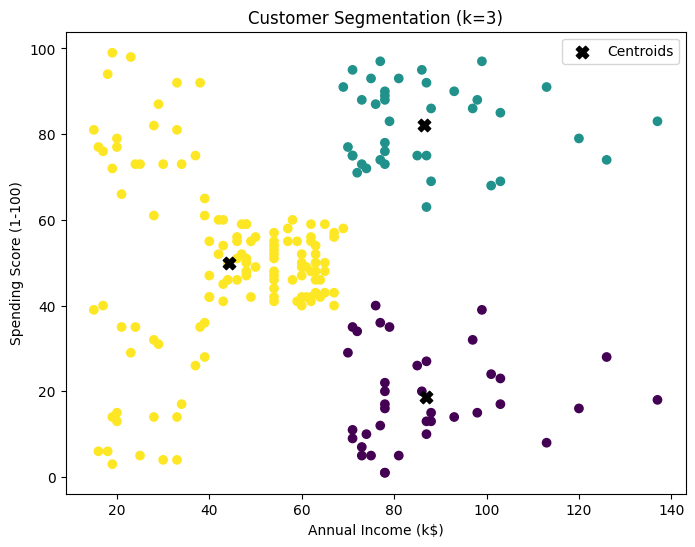

In [45]:
plt.figure(figsize=(8,6))
plt.scatter(df["Annual Income (k$)"], df["Spending Score (1-100)"],c=y_k3)
centers = k3.cluster_centers_
plt.scatter(centers[:,0], centers[:,1],color="black",marker="X", s=80, label="Centroids")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("Customer Segmentation (k=3)")
plt.legend()
plt.show()

For k = 3, the customers are divided into three broad groups:

- High income – high spending (best customers)

- Low income – low spending (least valuable group)

- High income – low spending (potential customers to target)


______________________________________________________________________________________________________________________
# Now Implementing K = 5
_______________________________________________________________________________________________________________________

In [46]:
k5=KMeans(n_clusters=5, random_state=42)
y_k5=k5.fit_predict(X)
df["Cluster5"]=y_k5


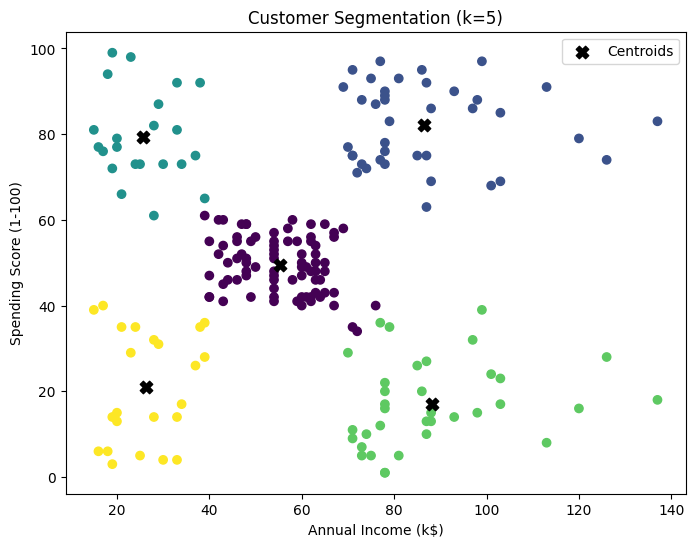

In [47]:
plt.figure(figsize=(8,6))
plt.scatter(df["Annual Income (k$)"], df["Spending Score (1-100)"],c=y_k5)
centers=k5.cluster_centers_
plt.scatter(centers[:,0], centers[:,1],color="black",marker="X",s=80,label="Centroids")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("Customer Segmentation (k=5)")
plt.legend()
plt.show()


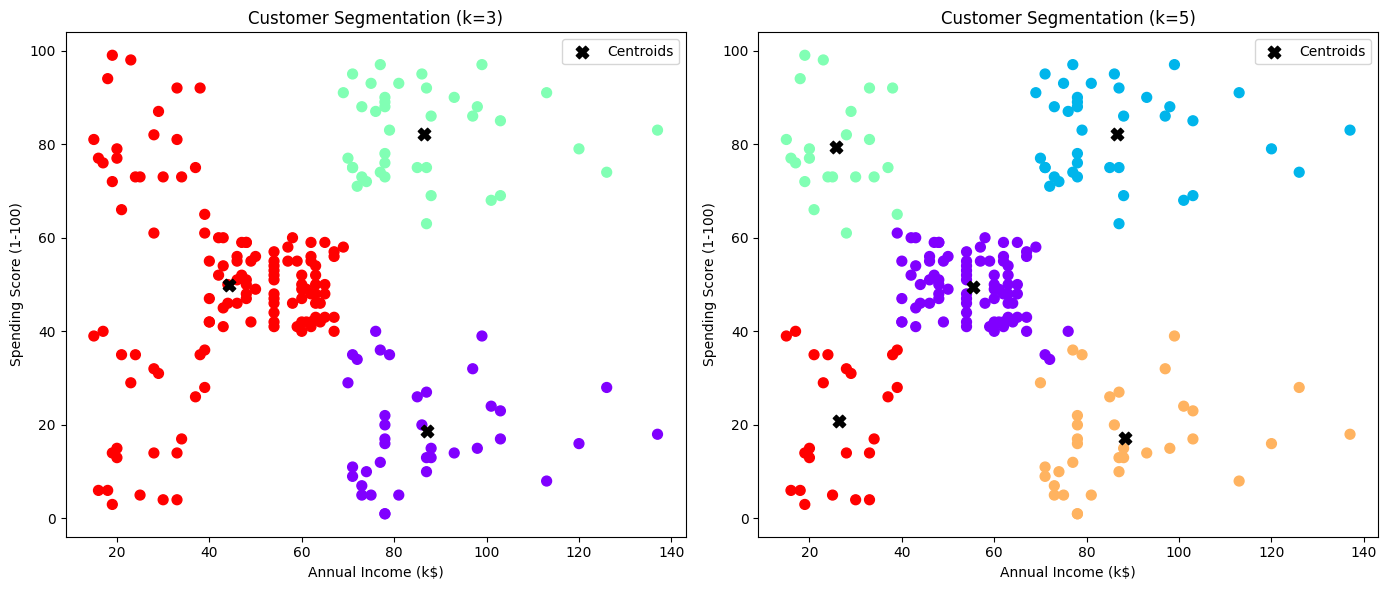

In [48]:
fig, axes = plt.subplots(1, 2, figsize=(14,6))
# K=3
axes[0].scatter(df["Annual Income (k$)"], df["Spending Score (1-100)"],
                c=df["Cluster3"], cmap="rainbow", s=50)
centers3 = k3.cluster_centers_
axes[0].scatter(centers3[:,0], centers3[:,1],
                color="black", marker="X", s=80, label="Centroids")
axes[0].set_title("Customer Segmentation (k=3)")
axes[0].set_xlabel("Annual Income (k$)")
axes[0].set_ylabel("Spending Score (1-100)")
axes[0].legend()
# K=5
axes[1].scatter(df["Annual Income (k$)"], df["Spending Score (1-100)"],
                c=df["Cluster5"], cmap="rainbow", s=50)
centers5 = k5.cluster_centers_
axes[1].scatter(centers5[:,0], centers5[:,1],
                color="black", marker="X", s=80, label="Centroids")
axes[1].set_title("Customer Segmentation (k=5)")
axes[1].set_xlabel("Annual Income (k$)")
axes[1].set_ylabel("Spending Score (1-100)")
axes[1].legend()
plt.tight_layout()
plt.show()


In [49]:
numerical_columns=['Annual Income (k$)','Spending Score (1-100)']
cluster_summary= df.groupby('Cluster5')[numerical_columns].mean()
print("\nCluster Analysis Summary:")
print(cluster_summary)



Cluster Analysis Summary:
          Annual Income (k$)  Spending Score (1-100)
Cluster5                                            
0                  55.296296               49.518519
1                  86.538462               82.128205
2                  25.727273               79.363636
3                  88.200000               17.114286
4                  26.304348               20.913043


For k = 5, the customers are divided into more detailed groups:

- 1: High income – high spending (premium customers)

- 4:Low income – low spending (budget customers)

- 3:High income – low spending (cautious spenders)

- 2:Low income – high spending (value for money customers)

- 0:Medium income – medium spending (average customers)


______________________________________________________________________________________________________________________
# Applying DBSCAN Clustering for Customer Segmentation
______________________________________________________________________________________________________________________

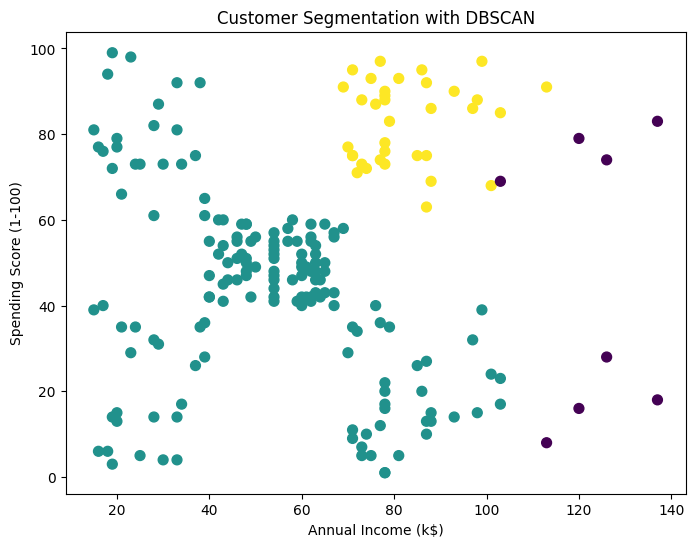

In [50]:
from sklearn.cluster import DBSCAN

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

dbscan = DBSCAN(eps=0.5, min_samples=5)
labels = dbscan.fit_predict(X_scaled)
df['DBSCAN_Cluster'] = labels

plt.figure(figsize=(8,6))
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'],c=labels,s=50)
plt.title("Customer Segmentation with DBSCAN")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.show()


______________________________________________________________________________________________________________________
# Average Spending Score per DBSCAN Cluster
______________________________________________________________________________________________________________________

In [51]:
cluster_summary = df.groupby('DBSCAN_Cluster')['Spending Score (1-100)'].mean()
print(cluster_summary)


DBSCAN_Cluster
-1    46.875000
 0    43.101911
 1    82.800000
Name: Spending Score (1-100), dtype: float64


______________________________________________________________________________________________________________________
# Visualizing Average Spending per DBSCAN Cluster

______________________________________________________________________________________________________________________

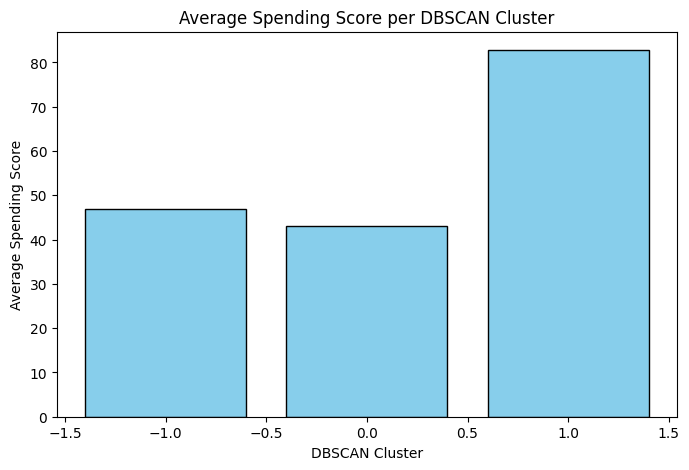

In [52]:
plt.figure(figsize=(8,5))
plt.bar(cluster_summary.index, cluster_summary.values,
        color="skyblue", edgecolor="black")

plt.xlabel("DBSCAN Cluster")
plt.ylabel("Average Spending Score")
plt.title("Average Spending Score per DBSCAN Cluster")
plt.show()


In [53]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

X, y_true = make_blobs(n_samples=300, n_features=2, centers=3, cluster_std=0.7, random_state=42)

kmeans = KMeans(n_clusters=3, random_state=42)
labels_kmeans = kmeans.fit_predict(X)

dbscan = DBSCAN(eps=0.5, min_samples=5)
labels_dbscan = dbscan.fit_predict(X)

def cluster_scores(X, labels, name):
    if len(set(labels)) < 2:
        print(f"{name}: Only one cluster found, scores not defined.")
        return

    silhouette = silhouette_score(X, labels)
    davies_bouldin = davies_bouldin_score(X, labels)
    calinski = calinski_harabasz_score(X, labels)

    print(f"\n{name} Results:")
    print("Silhouette Score:", silhouette)
    print("Davies-Bouldin Index:", davies_bouldin)
    print("Calinski-Harabasz Index:", calinski)

cluster_scores(X, labels_kmeans, "KMeans")
cluster_scores(X, labels_dbscan, "DBSCAN")



KMeans Results:
Silhouette Score: 0.8932417420300518
Davies-Bouldin Index: 0.14928348889690027
Calinski-Harabasz Index: 10542.407259542682

DBSCAN Results:
Silhouette Score: 0.7645464829896885
Davies-Bouldin Index: 1.4877280126634762
Calinski-Harabasz Index: 1697.9539816174113


# Conclusion
K-Means gave clear customer groups.

- With k=3, we saw broad segments (high spenders, low spenders, cautious spenders).

- With k=5, the groups became more detailed, showing different spending and income patterns.

DBSCAN detected 3 clusters plus outliers.

- One cluster had high spenders, another had low/medium spenders, and outliers were marked separately.

Overall, K-Means performed better for this dataset, as it produced clear and interpretable customer segments useful for business insights. DBSCAN was helpful for detecting outliers, but its clusters were less meaningful here.


In [54]:
import joblib
# joblib.dump(scaler, "scaler_Encoder.joblib")

In [55]:
joblib.dump(kmeans, "kmeans_Model.joblib")


['kmeans_Model.joblib']